In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import save_and_adjust_column_widths


# Read the two files
file1 = pd.read_excel('../results/Gaia_homogeneous_target_selection_M_earth_2_2025.08.04.xlsx', 
                      dtype={'source_id': str, 'source_id_dr2': str, 'source_id_dr3': str, 'HIP Number': str})

file2 = pd.read_excel('../results/Gaia_homogeneous_target_selection_M_earth_4_2025.08.06.xlsx', 
                      dtype={'source_id': str, 'source_id_dr2': str, 'source_id_dr3': str, 'HIP Number': str})


In [2]:
pwd

'/Users/jinzhao/Documents/GitHub/2ES_target_selection/src'

Stars from top 100 in file1 that are missing in file2: 0
Plotting 100 stars
Old rankings: 1 to 100
New rankings range: 1 to 1869
Results saved to ../results/top100_stars_with_new_ranking_over_100.xlsx
Saved 30 stars with new ranking > 100 to '../results/top100_stars_with_new_ranking_over_100.xlsx'


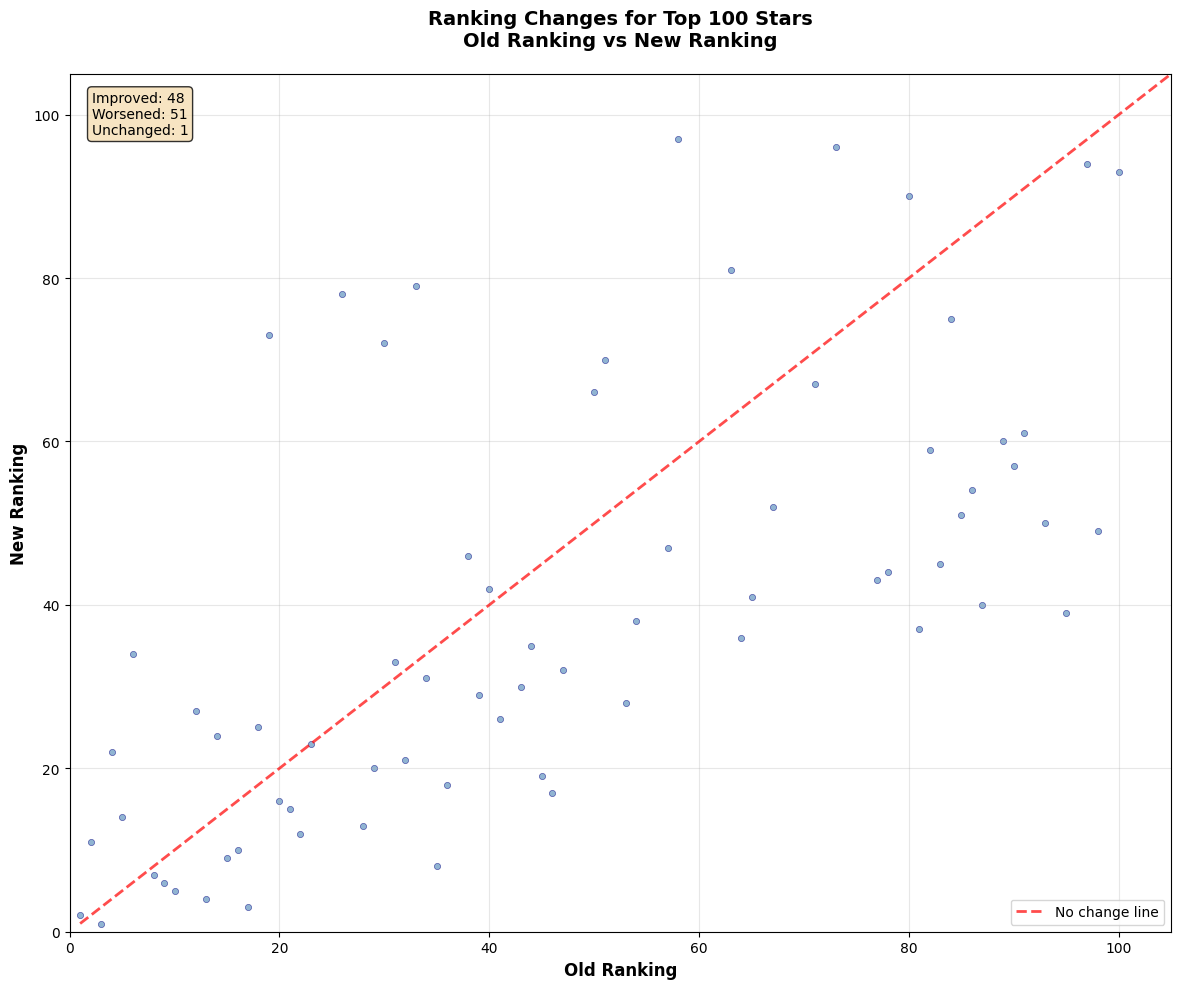


=== RANKING CHANGE STATISTICS ===
Total stars analyzed: 100
Stars that improved in ranking: 48 (48.0%)
Stars that worsened in ranking: 51 (51.0%)
Stars with unchanged ranking: 1 (1.0%)

Average ranking change: 118.9
Median ranking change: 1.5
Max improvement (negative = better): -56
Max decline (positive = worse): 1858


In [6]:
# Get the first 100 stars from file1 (rankings 1-100)
top_100_file1 = file1.head(100).copy()
top_100_file1['original_ranking'] = range(1, 101)

# Find their new rankings in file2
# Create a ranking mapping for file2
file2_with_ranking = file2.copy()
file2_with_ranking['new_ranking'] = range(1, len(file2) + 1)

# Merge to find new rankings
ranking_comparison = top_100_file1[['source_id', 'original_ranking']].merge(
    file2_with_ranking[['source_id', 'new_ranking']], 
    on='source_id', 
    how='left'
)

# Check for any stars that might not be in file2
missing_stars = ranking_comparison['new_ranking'].isna().sum()
print(f"Stars from top 100 in file1 that are missing in file2: {missing_stars}")

# Remove any missing stars for plotting
ranking_comparison = ranking_comparison.dropna()

print(f"Plotting {len(ranking_comparison)} stars")
print(f"Old rankings: 1 to {ranking_comparison['original_ranking'].max()}")
print(f"New rankings range: {ranking_comparison['new_ranking'].min()} to {ranking_comparison['new_ranking'].max()}")

# Find stars whose new ranking is > 100 and save them to a new file
stars_over_100 = ranking_comparison[ranking_comparison['new_ranking'] > 100].copy()
if not stars_over_100.empty:
    # Merge with file2 to get all file2 columns for these stars
    stars_over_100_full = stars_over_100.merge(
        file2_with_ranking, on='source_id', how='left', suffixes=('', '_file2')
    )
    # Place 'original_ranking' and 'new_ranking' as the first columns, then all file2 columns (excluding duplicate source_id)
    cols = ['original_ranking', 'new_ranking'] + [col for col in file2_with_ranking.columns if col != 'source_id']
    # Ensure 'source_id' is first if present
    if 'source_id' in stars_over_100_full.columns:
        cols = ['source_id'] + [c for c in cols if c != 'source_id']
    # Reorder columns
    stars_over_100_full = stars_over_100_full[cols]
    save_and_adjust_column_widths(stars_over_100_full, '../results/top100_stars_with_new_ranking_over_100.xlsx')
    print(f"Saved {len(stars_over_100_full)} stars with new ranking > 100 to '../results/top100_stars_with_new_ranking_over_100.xlsx'")
else:
    print("No stars from the original top 100 have a new ranking > 100.")

# Create the plot
plt.figure(figsize=(12, 10))
plt.scatter(ranking_comparison['original_ranking'], ranking_comparison['new_ranking'], 
           alpha=0.6, s=20, color='steelblue', edgecolors='navy', linewidth=0.5)

# Add diagonal line for reference (no change in ranking)
max_rank = max(ranking_comparison['original_ranking'].max(), ranking_comparison['new_ranking'].max())
plt.plot([1, max_rank], [1, max_rank], 'r--', alpha=0.7, linewidth=2, label='No change line')

plt.xlabel('Old Ranking', fontsize=12, fontweight='bold')
plt.ylabel('New Ranking', fontsize=12, fontweight='bold')
plt.title('Ranking Changes for Top 100 Stars\nOld Ranking vs New Ranking', 
          fontsize=14, fontweight='bold', pad=20)

# Add grid
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(0, 105)
plt.ylim(0, ranking_comparison['new_ranking'].max() + 10)

# Add legend
plt.legend()

# Add some statistics as text
improved = (ranking_comparison['new_ranking'] < ranking_comparison['original_ranking']).sum()
worsened = (ranking_comparison['new_ranking'] > ranking_comparison['original_ranking']).sum()
unchanged = (ranking_comparison['new_ranking'] == ranking_comparison['original_ranking']).sum()

stats_text = f'Improved: {improved}\nWorsened: {worsened}\nUnchanged: {unchanged}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.show()

# Print some detailed statistics
print(f"\n=== RANKING CHANGE STATISTICS ===")
print(f"Total stars analyzed: {len(ranking_comparison)}")
print(f"Stars that improved in ranking: {improved} ({improved/len(ranking_comparison)*100:.1f}%)")
print(f"Stars that worsened in ranking: {worsened} ({worsened/len(ranking_comparison)*100:.1f}%)")
print(f"Stars with unchanged ranking: {unchanged} ({unchanged/len(ranking_comparison)*100:.1f}%)")

# Calculate average ranking change
ranking_change = ranking_comparison['new_ranking'] - ranking_comparison['original_ranking']
print(f"\nAverage ranking change: {ranking_change.mean():.1f}")
print(f"Median ranking change: {ranking_change.median():.1f}")
print(f"Max improvement (negative = better): {ranking_change.min()}")
print(f"Max decline (positive = worse): {ranking_change.max()}")

In [7]:
print(ranking_comparison['new_ranking'].values)

[   2   11    1   22   14   34  163    7    6    5 1869   27    4   24
    9   10    3   25   73   16   15   12   23  184  126   78  237   13
   20   72   33   21   79   31    8   18 1719   46   29   42   26  597
   30   35   19   17   32  470  115   66   70  116   28   38 1494  142
   47   97  255  576  165  973   81   36   41  154   52 1653  139  234
   67  236   96  204  418  206   43   44  312   90   37   59   45   75
   51   54   40  146   60   57   61  136   50  117   39  594   94   49
  442   93]


In [9]:
from config import *
from gaia_queries import *
from data_processing import *
from plotting import *
from stellar_calculations import *
from utils import *
from catalog_integration import CatalogProcessor
from filtering import filter_stellar_data
from gaia_tess_overlap import match_gaia_tess, save_overlapping_stars

In [14]:
top_100_file2 = file2.head(100).copy()

analyze_stellar_data(
        df=top_100_file2,
        hz_limits=[1.5],
        show_plot=False
    )




Analyzing stellar data and creating histograms for different HZ Detection Limits: [1.5]
Saved ../figures/star_properties_histograms_M_earth_1_5.png


{1.5:                        source_id        source_id_dr2        source_id_dr3  \
 0   Gaia DR3 6412595290592307840  6412595290592307840  6412595290592307840   
 1   Gaia DR3 5164707970261890560  5164707970261630080  5164707970261890560   
 2   Gaia DR3 4109034455276324608  4109034455276324608  4109034455276324608   
 3   Gaia DR3 6232511606838403968  6232511606838403968  6232511606838403968   
 4   Gaia DR3 6697578465310949376  6697578465310949376  6697578465310949376   
 ..                           ...                  ...                  ...   
 95  Gaia DR3 4079684229322231040  4079684229322231040  4079684229322231040   
 96  Gaia DR3 4722111590409480064  4722111590409480064  4722111590409480064   
 97  Gaia DR3 5274724279107404544  5274724274807870336  5274724279107404544   
 98  Gaia DR3 3865002247461685248  3865002247461685248  3865002247461685248   
 99  Gaia DR3 5170039467784804096  5170039502144332800  5170039467784804096   
 
             RA        DEC     V_mag  Phot G 